<a href="https://colab.research.google.com/github/soma2000-lang/transformers_practice/blob/master/PyTorch_code_for_Cauchy_divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Divergence of SGD for Cauchy data

- Solve $\langle w, x_i\rangle = y_i$ using least-squares SGD where $x_i$ is Cauchy distributed

- this fails for every setting of learning rate and batch size
- [proof](https://math.stackexchange.com/a/4838822/998) from Amir: $E_s = \prod_i^s (1-\alpha x_i^2)^2$ converges to $\infty$ almost surely for every setting of $\alpha>0$

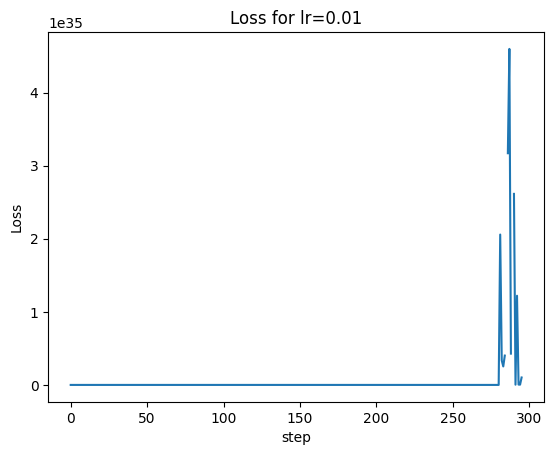

In [ ]:
import torch
import torch.utils.data as data

import numpy as np
import torch

import torch
import torch.nn as nn
import torch
import torch.utils.data as data

from contextlib import contextmanager
from typing import Callable, Tuple

import torch
import torch.nn as nn

import numpy as np

import sys

def least_squares_loss(data: torch.Tensor, targets=None, aggregation='mean'):
    """Least squares loss (like MSELoss, but an extra 1/2 factor."""
    assert aggregation in ('mean', 'sum')
    if targets is None:
        targets = torch.zeros_like(data)
    # err = data - targets.view(-1, data.shape[1])
    err = data - targets
    normalizer = len(data) if aggregation == 'mean' else 1
    return torch.sum(err * err) / 2 / normalizer


import urllib
import numpy as np
import urllib.request
from io import BytesIO

class CauchyDataset(data.Dataset):
    def __init__(self, d):
        super().__init__()
        self.d = d


    def __getitem__(self, index):
        return torch.distributions.Cauchy(0, 1).sample((self.d,)), 0

    def __len__(self):
        return 10


def infinite_iter(obj):
    """Wraps iterable object to restart on last iteration."""

    while True:
        for result in iter(obj):
            yield result


def getLoss(model):
    """Compute test loss"""
    losses = []
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)
        output = model(data)
        losses.append(loss_fn(output, targets).item())
    return np.mean(losses)




device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = least_squares_loss

lr = 0.01
d = 2
layer = nn.Linear(d, d, bias=False)
layer.weight.data.copy_(torch.eye(d))
model = torch.nn.Sequential(layer).to(device)

dataset = CauchyDataset(d)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
train_iter = infinite_iter(train_loader)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
test_iter = iter(test_loader)
device = 'cuda' if torch.cuda.is_available() else 'cpu'


optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0)
num_steps = 1000

losses = [getLoss(model)]
for step in range(num_steps):
    optimizer.zero_grad()
    data, targets = next(train_iter)
    data = data.to(device)
    targets = targets.to(device)

    output = model(data)
    loss = loss_fn(output, targets)
    loss.backward()

    optimizer.step()
    losses.append(getLoss(model))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title(f'Loss for lr={lr}')
plt.xlabel('step')
plt.ylabel('Loss')
plt.show()